In [27]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
test = pd.read_csv('titanic/test.csv')
train = pd.read_csv("titanic/train.csv")

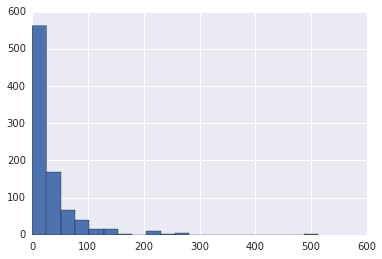

In [51]:
train.Fare.hist(bins=20)
#train.Pclass.hist(bins=20)
#train.Parch.hist(bins=20)

In [52]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

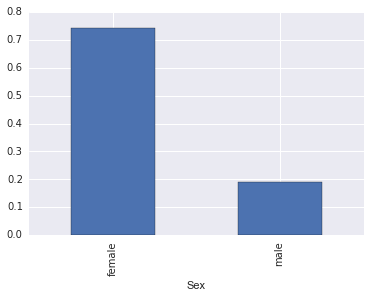

In [53]:
sex_survived = pd.pivot_table(train, index='Sex', values='Survived')
sex_survived.plot(kind='bar')

In [55]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


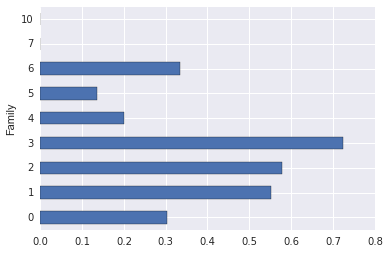

In [56]:
train.pivot_table(index=["Family"], values="Survived").plot(kind="barh")

In [57]:
train["Age"] = train["Age"].fillna(21)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0


In [59]:
pd.pivot_table(train, index=["Sex", "Family"], values=["Survived"])

Survived
Sex    Family          
female 0       0.785714
       1       0.816092
       2       0.775510
       3       0.842105
       4       0.250000
       5       0.375000
       6       0.375000
       7       0.000000
       10      0.000000
male   0       0.155718
       1       0.243243
       2       0.396226
       3       0.500000
       4       0.000000
       5       0.000000
       6       0.250000
       7       0.000000
       10      0.000000

In [76]:
pd.pivot_table(train, index=["Sex", "Family", "Age"], values=["Survived"])

Survived
Sex    Family Age           
female 0      5.0   1.000000
              13.0  1.000000
              14.0  0.000000
              15.0  1.000000
              16.0  1.000000
              17.0  0.666667
              18.0  0.500000
              19.0  1.000000
              20.0  0.000000
              21.0  0.766667
              22.0  0.714286
              23.0  0.666667
              24.0  0.714286
              25.0  0.000000
              26.0  1.000000
              27.0  1.000000
              28.0  0.750000
              29.0  1.000000
              30.0  0.888889
              30.5  0.000000
              31.0  0.500000
              32.0  1.000000
              32.5  1.000000
              33.0  1.000000
              34.0  1.000000
              35.0  1.000000
              36.0  1.000000
              37.0  0.000000
              38.0  0.666667
              40.0  1.000000
...                      ...
male   3      1.0   1.000000
              11.0  1.000000
              21.0  0.000000
              23.0  0.000000
              25.0  0.000000
              26.0  0.000000
              36.0  0.500000
       4      2.0   0.000000
              16.0  0.000000
              21.0  0.000000
       5      1.0   0.000000
              2.0   0.000000
              4.0   0.000000
              7.0   0.000000
              8.0   0.000000
              10.0  0.000000
              14.0  0.000000
              16.0  0.000000
              19.0  0.000000
              40.0  0.000000
              64.0  0.000000
       6      3.0   1.000000
              4.0   0.000000
              9.0   0.000000
              39.0  0.000000
       7      1.0   0.000000
              9.0   0.000000
              11.0  0.000000
              14.0  0.000000
       10     21.0  0.000000

[323 rows x 1 columns]

In [84]:
test['Survived'] = 1
test["Age"] = test["Age"].fillna(21)
test["Family"] = test["SibSp"] + test["Parch"]
test.loc[test["Sex"] == "male", "Survived"] = 0

In [86]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,2


In [96]:
test.loc[test["Age"] < 15, "Survived"] = 1
x = (test["Family"] > 3)
test.loc[(test["Sex"] == "female") &  x, "Survived"] = 0

In [110]:
test["Sex"] 

0        male
1      female
2        male
3        male
4      female
5        male
6      female
7        male
8      female
9        male
10       male
11       male
12     female
13       male
14     female
15     female
16       male
17       male
18     female
19     female
20       male
21       male
22     female
23       male
24     female
25       male
26     female
27       male
28       male
29       male
        ...  
388      male
389      male
390      male
391    female
392      male
393      male
394      male
395    female
396      male
397    female
398      male
399      male
400    female
401      male
402    female
403      male
404      male
405      male
406      male
407      male
408    female
409    female
410    female
411    female
412    female
413      male
414    female
415      male
416      male
417      male
Name: Sex, dtype: object

In [111]:
test["Survived"]

0      0
1      1
2      0
3      0
4      1
5      1
6      1
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     1
20     0
21     1
22     1
23     0
24     0
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    1
390    0
391    1
392    1
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    0
405    0
406    0
407    0
408    1
409    1
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, dtype: int64

In [112]:
test.to_csv("titanic/gfinished.csv", index=False)

In [113]:
pd.read_csv("titanic/gfinished.csv")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,Family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,2
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,1,0
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,1,0
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,2
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,1,0
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,2
